<a href="https://colab.research.google.com/github/antoinemarchal/CAIRO/blob/main/CAIRO_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install cfitsio and CAIRO

In [1]:
import os
os.chdir('/content/')

## Installing cfitsio if required (already available on Collab)

In [ ]:
#!wget http://heasarc.gsfc.nasa.gov/FTP/software/fitsio/c/cfitsio-3.47.tar.gz

In [2]:
# %%capture
# !gunzip -c cfitsio-3.47.tar.gz | tar xv
# %cd cfitsio-3.47/
# !./configure --enable-sse2 --enable-reentrant
# !make && make install

## Installing CAIRO

In [3]:
#Download CAIRO
os.chdir('/content/')
!git clone https://github.com/antoinemarchal/CAIRO CAIRO

#Compile
os.chdir('CAIRO/src')
!make clean OUT=gCAIRO
!make FC=gfortran OUT=gCAIRO

Cloning into 'CAIRO'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 86 (delta 34), reused 69 (delta 17), pack-reused 0
Receiving objects: 100% (86/86), 5.19 MiB | 22.06 MiB/s, done.
Resolving deltas: 100% (34/34), done.
\rm -rf *.o gCAIRO *.mod *~
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c blas.f
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c lbfgsb.f
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c linpack.f
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c timer.f
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c mod_constants.f90
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c mod_convert.f90
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c mod_fits.f90
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c mod_inout.f90
gfortran -O2 -I/usr/local/include -ffree-line-length-512  -c mod_

In [15]:
#Download python tools (note: this is not a wrapper of CAIRO)
%%capture
os.chdir('/content/CAIRO/')
!git clone https://github.com/antoinemarchal/CAIROpy CAIROpy
os.chdir('/content/CAIRO/CAIROpy')
!pip install .
os.chdir('/content/')

# Run CAIRO on test cube

In [28]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

from CAIROpy import CAIRO

#Load data
path="/content/CAIRO/data/"
filename = "N5236_cropped_subcube.fits"
hdu = fits.open(path+filename)
hdr = hdu[0].header
cube = hdu[0].data

core = CAIRO(cube, hdr=hdr)

filename_parameters = path + "N5236_cropped_subcube_parameters_run_0.txt"
filename = path + "N5236_cropped_subcube.fits"
fileout = "!" + path + "N5236_cropped_subcube_gauss_run_0.fits"
filename_noise = path + "N5236_cropped_subcube_rms.fits"
filename_init_spec = path + "N5236_input.csv"
filename_lsf = path + "N5236_lsf.csv"
n_gauss = 6
lambda_amp = 1.
lambda_mu = 1.
lambda_sig = 1.
lambda_sig_corr_narrow = 1.
lambda_sig_corr_broad = 0.
lambda_mu_corr_narrow = 1.
lambda_mu_corr_broad = 0.
lambda_var_sig = 1.
lambda_r = 1.
lb_sig = 1.
ib_sig = 4.
ub_sig = 10.
lb_amp = 0.01
ub_amp = 0.
maxiter = 800
iprint = 50
descent = ".false."


In [29]:
os.chdir('/content/CAIRO/data/')
core.gen_parameters(filename_parameters=filename_parameters,
                    filename=filename,
                    fileout=fileout,
                    filename_noise=filename_noise,
                    filename_init_spec=filename_init_spec,
                    filename_lsf=filename_lsf,
                    n_gauss=n_gauss,
                    lambda_amp=lambda_amp,
                    lambda_mu=lambda_mu,
                    lambda_sig=lambda_sig,
                    lambda_sig_corr_narrow=lambda_sig_corr_narrow,
                    lambda_sig_corr_broad=lambda_sig_corr_broad,
                    lambda_mu_corr_narrow=lambda_mu_corr_narrow,
                    lambda_mu_corr_broad=lambda_mu_corr_broad,
                    lambda_var_sig=lambda_var_sig,
                    lambda_r=lambda_r,
                    lb_sig=lb_sig,
                    ib_sig=ib_sig,
                    ub_sig=ub_sig,
                    lb_amp=lb_amp,
                    ub_amp=ub_amp,
                    maxiter=maxiter,
                    iprint=iprint,
                    descent=descent
                    )

Generate /content/CAIRO/data/N5236_cropped_subcube_parameters_run_0.txt file


In [30]:
os.chdir('/content/CAIRO/data/')
!/content/CAIRO/src/gCAIRO /content/CAIRO/data/N5236_cropped_subcube_parameters_run_0.txt

 -------------------------------------------------------------------------
11 May 2024   0:53:07.550 AM
 
           ___           ___                       ___           ___      
          /  /\         /  /\        ___          /  /\         /  /\     
         /  /:/        /  /::\      /  /\        /  /::\       /  /::\    
        /  /:/        /  /:/\:\    /  /:/       /  /:/\:\     /  /:/\:\   
       /  /:/  ___   /  /:/~/::\  /__/::\      /  /:/~/:/    /  /:/  \:\  
      /__/:/  /  /\ /__/:/ /:/\:\ \__\/\:\__  /__/:/ /:/___ /__/:/ \__\:\ 
      \  \:\ /  /:/ \  \:\/:/__\/    \  \:\/\ \  \:\/:::::/ \  \:\ /  /:/ 
       \  \:\  /:/   \  \::/          \__\::/  \  \::/~~~~   \  \:\  /:/  
        \  \:\/:/     \  \:\          /__/:/    \  \:\        \  \:\/:/   
         \  \::/       \  \:\         \__\/      \  \:\        \  \::/    
          \__\/         \__\/                     \__\/         \__\/     
 
  Version 1.0.0
  CAIRO is released as open source code
 
 run: ./C

#Open result

In [31]:
#Open data
path = "/content/CAIRO/data/"
fitsname = "N5236_cropped_subcube_gauss_run_0.fits"
hdu = fits.open(path+fitsname)
params = hdu[0].data

dv=1 #FIXME

#CAIRO MAPS - Flux (integral), A, MU, and SIG
field = params[0::3] * np.abs(params[2::3]) * np.sqrt(2.*np.pi) * dv # integral Gaussians sqrt(2pi) * dv * a * mu
ampfield = params[0::3] # in units of the input cube
vfield = params[1::3] # pixel position along spectral axis in cube
sigfield = np.abs(params[2::3]) * dv # in km/s

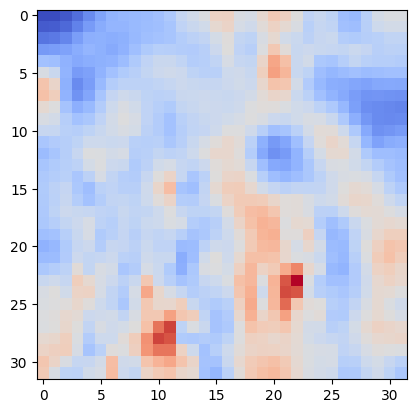

In [32]:
plt.imshow(vfield[0], cmap="coolwarm")

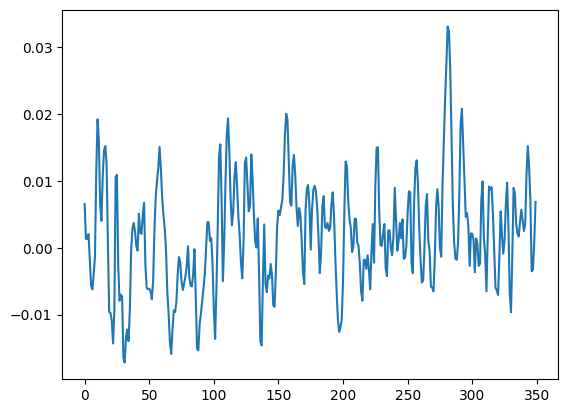

In [33]:
plt.plot(cube[:,10,16])